<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1



In [111]:
import torch
import tensorflow
import matplotlib.pyplot as plt
# In[2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_u_mean = t_u.mean()
t_u_std = t_u.std()
t_un = (t_u - t_u_mean) / t_u_std
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
# Clone the parameters and maintain them as leaf tensors
trained_params = params.clone().detach()
trained_params.requires_grad_()


tensor([1., 1., 0.], requires_grad=True)

In [112]:
def linear_model(t_u, w, b):
    return w * t_u + b

In [113]:
def nonlinear_model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [114]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [121]:
def train_nonlinear_model(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        # Forward pass using the nonlinear model
        t_p = nonlinear_model(t_u, *params)

        # Compute loss
        loss = loss_fn(t_p, t_c)

        # Check for NaN loss
        if torch.isnan(loss):
            print(f'Loss is NaN for epoch {epoch}.')
            break

        # Zero the gradients before backward pass
        if params.grad is not None:
            params.grad.zero_()

        # Backward pass
        loss.backward()

        # Update parameters
        with torch.no_grad():
            params -= learning_rate * params.grad

        # Report loss
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, loss.item()))

    return params


In [122]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    # Reset the parameters for each training run
    trained_params = params.clone().detach()
    trained_params.requires_grad_()
    trained_params = train_nonlinear_model(
        n_epochs=5000,
        learning_rate=lr,
        params=trained_params,
        t_u=t_un,  # Use normalized input
        t_c=t_c
    )


Training with learning rate: 0.1
Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720

Training with learning rate: 0.01
Epoch 500, Loss 2.092286
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090719
Epoch 2000, Loss 2.090719
Epoch 2500, Loss 2.090719
Epoch 3000, Loss 2.090719
Epoch 3500, Loss 2.090719
Epoch 4000, Loss 2.090719
Epoch 4500, Loss 2.090719
Epoch 5000, Loss 2.090719

Training with learning rate: 0.001
Epoch 500, Loss 25.740374
Epoch 1000, Loss 8.287434
Epoch 1500, Loss 3.992266
Epoch 2000, Loss 2.734116
Epoch 2500, Loss 2.320184
Epoch 3000, Loss 2.174658
Epoch 3500, Loss 2.121781
Epoch 4000, Loss 2.102272
Epoch 4500, Loss 2.095026
Epoch 5000, Loss 2.092327

Training with learning rate: 0.0001
Epoch 500, Loss 119.458710
Epoch 1000, Loss 95.091667
Epoch 1500, Loss 77.399010

In [123]:
best_nonlinear_params = torch.tensor([0.0001, 0.001, 0.0], requires_grad=True)
linear_params = torch.tensor([1.0, 0.0])  # Example parameters: w, b

Epoch 500, Loss 8.032533
Epoch 1000, Loss 8.019882
Epoch 1500, Loss 8.007269
Epoch 2000, Loss 7.994696
Epoch 2500, Loss 7.982159
Epoch 3000, Loss 7.969660
Epoch 3500, Loss 7.957199
Epoch 4000, Loss 7.944778
Epoch 4500, Loss 7.932393
Epoch 5000, Loss 7.920044
Non-linear Model Loss: 7.920019626617432
Linear Model Loss: 1763.884765625


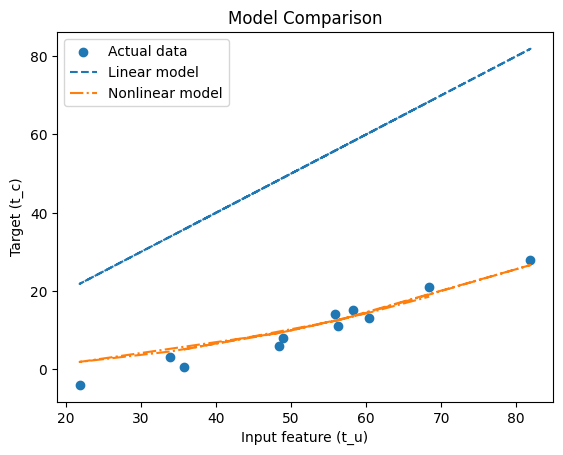

In [124]:
# Assuming you have defined the number of epochs and learning rate somewhere above
n_epochs = 5000
learning_rate = 0.00000001  # or whatever learning rate you have determined to be best

# Train the nonlinear model with the correct parameters
trained_nonlinear_params = train_nonlinear_model(
    n_epochs=n_epochs,
    learning_rate=learning_rate,
    params=best_nonlinear_params,
    t_u=t_u,
    t_c=t_c
)

# After training, use the trained parameters to get predictions
t_p_nonlinear = nonlinear_model(t_u, *trained_nonlinear_params).detach()
t_p_linear = linear_model(t_u, *linear_params).detach()

# Calculate the loss for each model
nonlinear_loss = loss_fn(t_p_nonlinear, t_c)
linear_loss = loss_fn(t_p_linear, t_c)

# Print out the losses for comparison
print(f'Non-linear Model Loss: {nonlinear_loss.item()}')
print(f'Linear Model Loss: {linear_loss.item()}')

# Plot the actual data
plt.scatter(t_u.numpy(), t_c.numpy(), label='Actual data')

# Plot the linear model predictions
plt.plot(t_u.numpy(), t_p_linear.numpy(), label='Linear model', linestyle='--')

# Plot the non-linear model predictions
plt.plot(t_u.numpy(), t_p_nonlinear.numpy(), label='Nonlinear model', linestyle='-.')

plt.legend()
plt.xlabel('Input feature (t_u)')
plt.ylabel('Target (t_c)')
plt.title('Model Comparison')
plt.show()
